<a href="https://colab.research.google.com/github/mulcahrj/6999_Capstone/blob/main/DATA6999_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/DATA6999/selected_features.csv",na_values='-')

In [6]:
df.head(5)

,InscClaimAmtReimbursed,Hospitalization_Duration,NoOfMonths_PartBCov,NoOfMonths_PartACov,Claim_Period,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,Patient_Age,Patient_Risk_Score,ChronicCond_Alzheimer,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,Gender_1,Gender_2,Race_1,PotentialFraud,Provider
0,0.994980,1.000000,1.0,1.0,0.991831,0.998780,0.056535,0.395268,0.602524,1,0,1,1,0,1,1,PRV55912
1,0.204499,0.000000,1.0,1.0,0.000000,0.997524,0.204382,0.548797,0.351837,1,0,0,1,0,1,1,PRV55912
2,0.992624,1.000000,1.0,1.0,0.998328,0.996393,0.073183,0.889586,0.436861,1,0,0,0,1,1,1,PRV55912
3,0.991593,1.000000,1.0,1.0,0.999427,0.995721,0.373397,0.707005,0.177925,0,1,0,1,0,1,1,PRV55912
4,0.988580,0.999998,1.0,1.0,0.981119,0.997969,0.204382,0.564990,0.520349,0,1,1,0,1,1,1,PRV55912


In [7]:
provider = df['Provider']

In [8]:
df = df.drop('Provider', axis=1)

In [9]:
df.head(5)

,InscClaimAmtReimbursed,Hospitalization_Duration,NoOfMonths_PartBCov,NoOfMonths_PartACov,Claim_Period,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,Patient_Age,Patient_Risk_Score,ChronicCond_Alzheimer,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,Gender_1,Gender_2,Race_1,PotentialFraud
0,0.994980,1.000000,1.0,1.0,0.991831,0.998780,0.056535,0.395268,0.602524,1,0,1,1,0,1,1
1,0.204499,0.000000,1.0,1.0,0.000000,0.997524,0.204382,0.548797,0.351837,1,0,0,1,0,1,1
2,0.992624,1.000000,1.0,1.0,0.998328,0.996393,0.073183,0.889586,0.436861,1,0,0,0,1,1,1
3,0.991593,1.000000,1.0,1.0,0.999427,0.995721,0.373397,0.707005,0.177925,0,1,0,1,0,1,1
4,0.988580,0.999998,1.0,1.0,0.981119,0.997969,0.204382,0.564990,0.520349,0,1,1,0,1,1,1


In [10]:

# import required packages for splitting data
from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import 'random forest' model
from sklearn.ensemble import RandomForestClassifier

# balance the data
from imblearn.over_sampling import SMOTE


In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [12]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .25, train_size = .75)

In [14]:

#Create Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=2022)

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [15]:
df_pred = pd.DataFrame(x_test,columns=list(df.iloc[:,:-1]))

In [16]:
df_pred['PotentialFraud'] = y_test

In [17]:
df_pred['PredictedFraud'] = y_pred

In [18]:
df_pred = provider.to_frame().join(df_pred, how='inner')

In [19]:
df_pred.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Provider,139553,294,PRV51459,8240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InscClaimAmtReimbursed,139553.0,NaN,NaN,NaN,0.40342,0.302679,0.0,0.168756,0.297619,0.625431,1.0
Hospitalization_Duration,139553.0,NaN,NaN,NaN,0.073375,0.260735,0.0,0.0,0.0,0.0,1.0
NoOfMonths_PartBCov,139553.0,NaN,NaN,NaN,0.99239,0.086903,0.0,1.0,1.0,1.0,1.0
NoOfMonths_PartACov,139553.0,NaN,NaN,NaN,0.993852,0.078169,0.0,1.0,1.0,1.0,1.0
Claim_Period,139553.0,NaN,NaN,NaN,0.179251,0.374852,0.0,0.0,0.0,0.0,1.0
IPAnnualReimbursementAmt,139553.0,NaN,NaN,NaN,0.95322,0.025951,0.0,0.935341,0.935341,0.983984,1.0
OPAnnualReimbursementAmt,139553.0,NaN,NaN,NaN,0.406835,0.230368,0.026559,0.20776,0.39949,0.589992,1.0
Patient_Age,139553.0,NaN,NaN,NaN,0.509014,0.180954,0.0,0.407686,0.502575,0.615749,1.0
Patient_Risk_Score,139553.0,NaN,NaN,NaN,0.407565,0.210086,0.0,0.265454,0.436861,0.602524,1.0


In [20]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.79      0.74     86384
           1       0.56      0.44      0.49     53169

    accuracy                           0.66    139553
   macro avg       0.63      0.61      0.62    139553
weighted avg       0.64      0.66      0.64    139553



In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6552850888193016
Precision: 0.5610456003279558
Recall: 0.4375858112810096


In [22]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[68181, 18203],
       [29903, 23266]])

Text(0.5, 427.9555555555555, 'Predicted label')

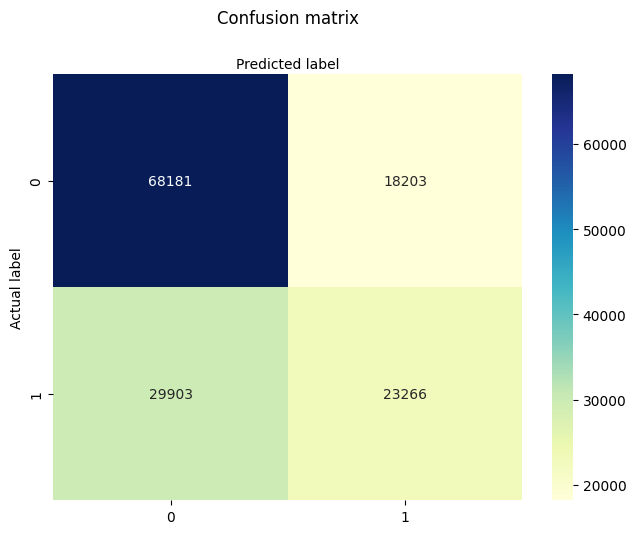

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

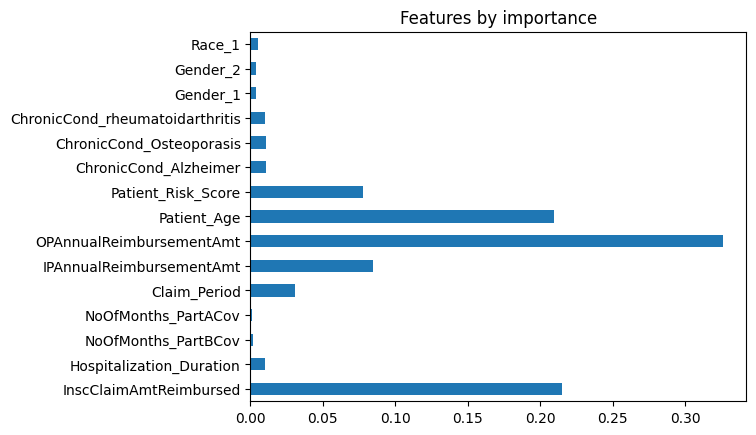

In [24]:
feat_importances = pd.Series(clf.feature_importances_, index=df.iloc[:,:-1].columns)
feat_importances.plot(kind='barh')
plt.title("Features by importance")
plt.show()

In [25]:
feat_importances

InscClaimAmtReimbursed             0.215285
Hospitalization_Duration           0.010258
NoOfMonths_PartBCov                0.001602
NoOfMonths_PartACov                0.001295
Claim_Period                       0.030888
IPAnnualReimbursementAmt           0.084473
OPAnnualReimbursementAmt           0.326035
Patient_Age                        0.209229
Patient_Risk_Score                 0.077649
ChronicCond_Alzheimer              0.010496
ChronicCond_Osteoporasis           0.010816
ChronicCond_rheumatoidarthritis    0.009768
Gender_1                           0.003666
Gender_2                           0.003632
Race_1                             0.004906
dtype: float64

In [26]:
clf = RandomForestClassifier(n_estimators=100, random_state=2022)


In [27]:
#function inputs X:features.Y: Target, classifer: sklearn classifier, K:folds in cross validation, scoring: evaluation metric(f1)
def my_eval(X, y, classifer = clf, k=10, scoring = 'f1'):
    scores = []
    for i in range(5):
        #### generate random numbers to shuffle the data for training and test
        np.random.seed(2021)
        random_int = np.random.randint(0,3000)
        #### create cross validation folds
        kfold = model_selection.KFold(n_splits=k, random_state=random_int, shuffle=True)
        #### record the score
        score = model_selection.cross_val_score(clf, X=X, y=y, cv=kfold, scoring=scoring)
        scores.append(score)
    scores = np.array(scores)
    #### we need to calculate the bias (average score) and viariance (std)
    bias, variance = round(scores.mean(),4), round(scores.std(),4)
    return(bias, variance)

In [28]:
# Resampling and Balancing the data
sm = SMOTE(random_state = 2021)
X_res, Y_res = sm.fit_resample(x_train, y_train)

In [29]:
#average f1_score from 10-fold CV
clf = RandomForestClassifier(n_estimators=100, random_state=2022)
my_eval(X_res, Y_res, clf, 10)

(0.7123, 0.0019)

In [30]:
#average ROC_AUC from 10-fold CV
my_eval(X_res, Y_res, clf, 10, 'roc_auc')

(0.7874, 0.0013)

In [31]:
grp = ['Provider','PotentialFraud','PredictedFraud']

In [32]:
df_pred = df_pred[grp]

In [33]:
df_ratio = df_pred.groupby(by=['Provider']).sum()

In [34]:
df_ratio['Ratio'] = df_ratio['PredictedFraud'] / df_ratio['PotentialFraud']
df_ratio.sort_values(by=['Ratio'],ascending=False)

,PotentialFraud,PredictedFraud,Ratio
Provider,,,
PRV56118,3,5,1.666667
PRV55666,6,10,1.666667
PRV55414,4,6,1.500000
PRV57413,15,20,1.333333
PRV52048,35,41,1.171429
...,...,...,...
PRV54875,10,4,0.400000
PRV56490,7,2,0.285714
PRV56046,8,1,0.125000


In [35]:
df_ratio.describe().T

,count,mean,std,min,25%,50%,75%,max
PotentialFraud,294.0,180.846939,303.706534,0.0,27.00000,71.000000,203.750000,3215.000000
PredictedFraud,294.0,141.051020,236.178638,0.0,20.25000,52.000000,158.750000,2465.000000
Ratio,293.0,0.773051,0.162298,0.0,0.70674,0.776488,0.829268,1.666667


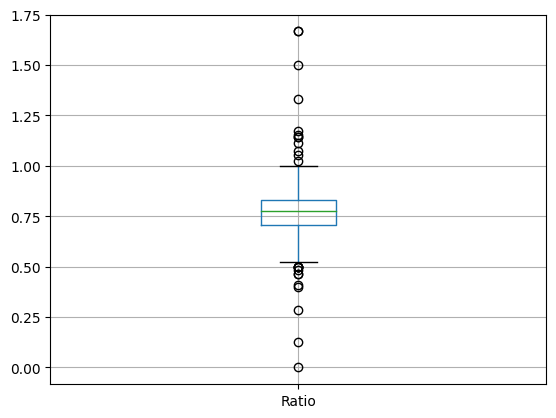

In [36]:
df_ratio.boxplot(column=['Ratio'], return_type='axes');


In [37]:
df_ratio['Ratio'].quantile([0.25, 0.7, 0.9])

0.25    0.706740
0.70    0.814815
0.90    0.900000
Name: Ratio, dtype: float64